In [79]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
# Open the file and read its contents
with open('ether_vs_time.txt', 'r') as file:
    data = file.read()

# Parse the data into a list of lists
parsed_data = json.loads(data)


# Create a pandas dataframe from the parsed data
df = pd.DataFrame(parsed_data, columns=['Date_scam_type',  'Ether value'])

# split the 'Date_scam_type' column into 'Month/Year' and 'Scam_type' columns
df[['Month/Year', 'Scam_type']] = df['Date_scam_type'].apply(lambda x: pd.Series(str(x).split(',')))

# remove the 'Date_scam_type' column
df = df.drop('Date_scam_type', axis=1)

#Removing unwanted characters in the df columns
df['Scam_type']=df['Scam_type'].str.replace("]","")
df['Scam_type']=df['Scam_type'].str.replace("'","")
df['Month/Year'] = df['Month/Year'].str.replace("[","")
df['Month/Year'] = df['Month/Year'].str.replace("'","")

#Convert the Month/Year column to datetime datatype and sorting them in ascending order.

df['Month/Year']=df['Month/Year'].apply(lambda x: x.strip('"'))
df['Month/Year'] = pd.to_datetime(df['Month/Year'], format='%m/%Y')
df = df.sort_values(by='Month/Year')
# Print the DataFrame
df

/tmp/ipykernel_2053/4146588373.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Scam_type']=df['Scam_type'].str.replace("]","")
/tmp/ipykernel_2053/4146588373.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Month/Year'] = df['Month/Year'].str.replace("[","")


,Ether value,Month/Year,Scam_type
39,9.000000e+16,2017-05-01,Phishing
32,1.000000e+18,2017-06-01,Phishing
8,1.826740e+20,2017-06-01,Fake ICO
25,9.878410e+18,2017-06-01,Scamming
26,1.624220e+19,2017-07-01,Fake ICO
16,1.060149e+22,2017-07-01,Phishing
36,2.452982e+21,2017-07-01,Scamming
40,1.811647e+20,2017-08-01,Fake ICO
11,3.016474e+19,2017-08-01,Scamming
15,1.417513e+22,2017-08-01,Phishing


In [81]:
#creating separate dataframes for each scam type
phishing_df= df[ df["Scam_type"] ==' Phishing' ]
scamming_df = df[df["Scam_type"] ==' Scamming']
fake_ico_df= df[df["Scam_type"] ==' Fake ICO']

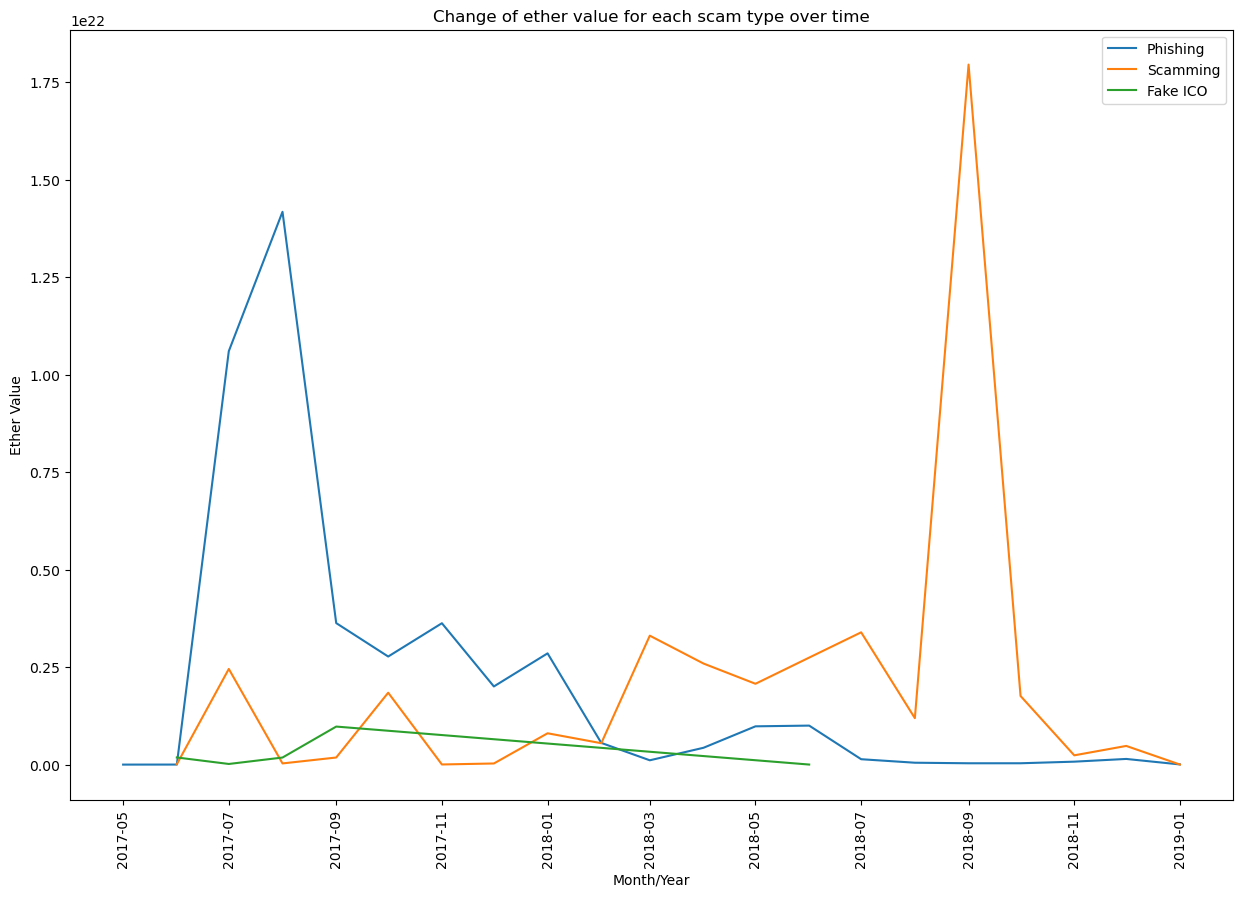

In [82]:
plt.figure(figsize = (15,10))
plt.title("Change of ether value for each scam type over time")
plt.xticks(rotation=90)
plt.plot(phishing_df['Month/Year'], phishing_df['Ether value'], label = 'Phishing')
plt.plot(scamming_df['Month/Year'], scamming_df['Ether value'], label = 'Scamming')
plt.plot(fake_ico_df['Month/Year'], fake_ico_df['Ether value'], label = 'Fake ICO')
plt.legend()
plt.xlabel("Month/Year")
plt.ylabel("Ether Value")
plt.savefig("Scam ether value vs time.png")
plt.show()